In [15]:
import gymnasium as gym
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output


env = gym.make('CartPole-v1', render_mode="human")

print("Action Space: ", env.action_space)
print("Obs Space: ", env.observation_space)


Action Space:  Discrete(2)
Obs Space:  Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)


In [16]:
observation, info = env.reset()

In [14]:
history = [[] for _ in range(4)]

In [17]:

for _ in range(100):

    env.render()    

 
    #world time step
    action = env.action_space.sample()  # agent policy that uses the observation and info
    action = 0
    obs, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        obs, info = env.reset()
    
    for i in range(4):
        history[i].append(obs[i])

    print(f'x {obs[0]:0.2f}, x\u0307 {obs[1]:0.2f}, \nθ {obs[2]:0.2f}, θ\u0307 {obs[3]:0.2f}, \nr {reward}', end='\r')
    # clear_output()

 



x 0.03, ẋ -0.20, 
θ 0.01, θ̇ 0.32, 
x 0.03, ẋ -0.40, 
θ 0.01, θ̇ 0.61, 
x 0.02, ẋ -0.59, 
θ 0.03, θ̇ 0.91, 
x 0.01, ẋ -0.79, 
θ 0.04, θ̇ 1.21, 
x -0.01, ẋ -0.98, 
θ 0.07, θ̇ 1.52, 
x -0.03, ẋ -1.18, 
θ 0.10, θ̇ 1.83, 
x -0.05, ẋ -1.37, 
θ 0.14, θ̇ 2.15, 
x -0.08, ẋ -1.57, 
θ 0.18, θ̇ 2.49, 
x 0.03, ẋ 0.04, 
θ -0.04, θ̇ -0.03, 
x 0.03, ẋ -0.16, 
θ -0.04, θ̇ 0.25, 
x 0.03, ẋ -0.35, 
θ -0.03, θ̇ 0.53, 
x 0.02, ẋ -0.55, 
θ -0.02, θ̇ 0.81, 
x 0.01, ẋ -0.74, 
θ -0.01, θ̇ 1.09, 
x -0.01, ẋ -0.94, 
θ 0.01, θ̇ 1.38, 
x -0.03, ẋ -1.13, 
θ 0.04, θ̇ 1.68, 
x -0.05, ẋ -1.33, 
θ 0.08, θ̇ 1.98, 
x -0.07, ẋ -1.52, 
θ 0.11, θ̇ 2.30, 
x -0.11, ẋ -1.72, 
θ 0.16, θ̇ 2.63, 
x -0.03, ẋ -0.04, 
θ 0.04, θ̇ -0.01, 
x -0.03, ẋ -0.23, 
θ 0.04, θ̇ 0.29, 
x -0.03, ẋ -0.43, 
θ 0.04, θ̇ 0.60, 
x -0.04, ẋ -0.62, 
θ 0.06, θ̇ 0.90, 
x -0.05, ẋ -0.82, 
θ 0.07, θ̇ 1.21, 
x -0.07, ẋ -1.02, 
θ 0.10, θ̇ 1.53, 
x -0.09, ẋ -1.21, 
θ 0.13, θ̇ 1.85, 
x -0.12, ẋ -1.41, 
θ 0.17, θ̇ 2.18, 
x -0.14, ẋ -1.

In [18]:
env.close()

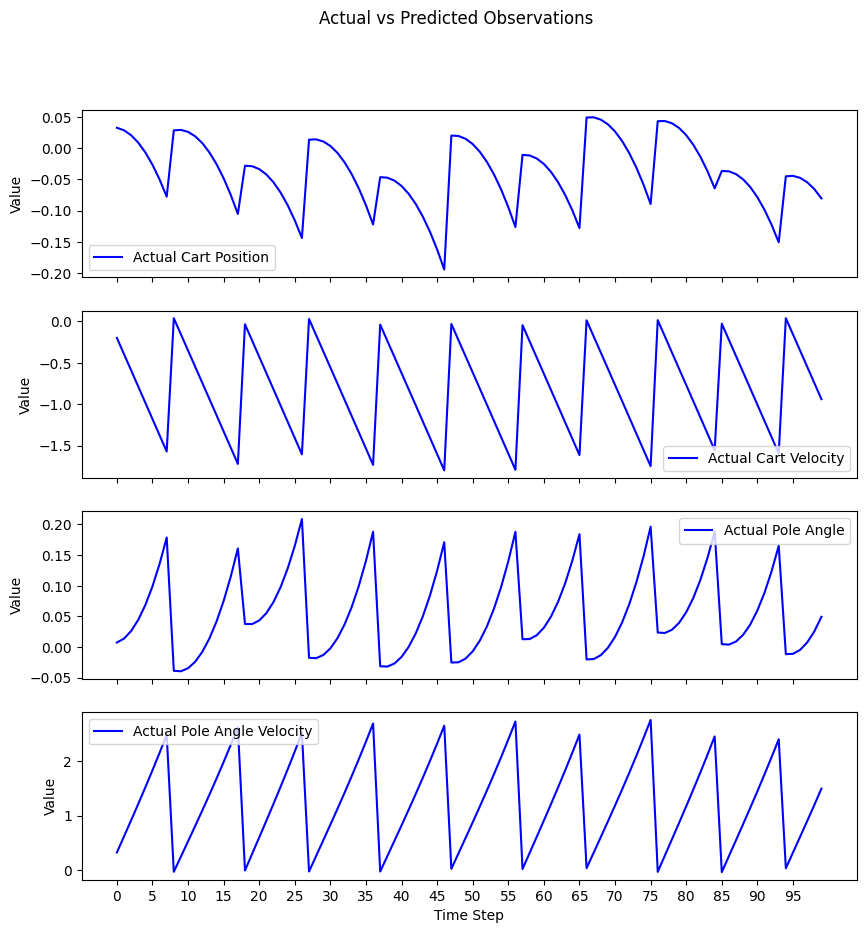

In [19]:
# Create subplots for each set of predicted and actual values
fig, axs = plt.subplots(4, 1, figsize=(10, 10), sharex=True)

legend_labels = {
    1: 'Cart Position',
    2: 'Cart Velocity',
    3: 'Pole Angle',
    4: 'Pole Angle Velocity'
}

# Plot actual and predicted values for each set
for i in range(4):
    axs[i].plot(history[i], color='blue', linestyle='-', label=f'Actual {legend_labels[i+1]}')
    axs[i].set_ylabel('Value')
    axs[i].legend()
    axs[i].set_xticks(range(0, len(history[i]), 5))

# Add labels and title
axs[-1].set_xlabel('Time Step')
plt.suptitle('Actual vs Predicted Observations')

# Show the plot
plt.show()